# Trabalho  - Métodos Quantitativos

**Mayara Amanda da Silva¹**

1 - Aluna do Mestrado em Ciência da Computação - UFJF

#### Tarefa AAG05
Desenvolver em Python um script que execute os seguintes passos:
Desenvolva em Python exemplo tão completo quanto o exemplo “Revisão”:
1. Escolher/Criar uma amostra bivariada para o exemplo
2. Calcule o coeficiente de correlação e só vá para “3” caso a amostra bivariada tenha
correlação forte (positiva ou negativa)
3. Estimar parâmetros, verificar a qualidade, calcular os erros
4. Calcular desvio padrão dos erros e dos parâmetros
5. Calcular intervalo de confiança dos parâmetros para níveis de confiança de 90%, 95% e 99%
6. Testar linearidade, independência de erros, erros normais, homocedasticidade (com gráficos)

Abaixo serão declaradas as bibliotecas usadas nesse trabalho.

In [167]:
from __future__ import unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp                                                         
import scipy.stats as stats   
import pylab
import statsmodels.api as sm
from matplotlib.lines import Line2D
from math import sqrt
from IPython.display import Image


%matplotlib inline

## 1. Escolha da amostra bivariada para o exemplo:
Para o desenvolvimento desse trabalho, foram utilizados os dados de 30 pacientes incluindo suas informações referentes a altura e peso. Essa amostragem é aleatória e foi extraida de uma base de dados do DataSus, contendo registros de atendimentos dos pacientes atendidos pelo SUS no ano de 2015. A amostra está representada abaixo:

In [165]:
data = pd.read_csv('consultas.csv')

data.shape[0]
data.head()

,DIA,ANO,MES,UBS,PROCEDIMENTO,PAC_CNS,SEXO,IDADE,PESO,ALTURA
0,1,2015,10,Ubs Alto Da Riviera,Consulta Medica Em Atenção Basica,801440426089443,M,12,22,1.23
1,1,2015,10,Ubs Alto Da Riviera,Consulta P/ Acompanhamento De Crescimento E De...,801440433562388,F,14,28,1.59
2,1,2015,10,Ubs Alto Da Riviera,Consulta Medica Em Atenção Basica,898001401222864,F,15,43,1.56
3,1,2015,10,Ubs Alto Da Riviera,Consulta Medica Em Atenção Basica,801440405314359,M,15,53,1.67
4,1,2015,10,Ubs Alto Da Riviera,Afericao De Pressao Arterial,801440463497584,F,18,58,1.62


In [4]:
del data['DIA']
del data['ANO']
del data['MES']
del data['UBS']
del data['PROCEDIMENTO']
del data['PAC_CNS']
del data['SEXO']
del data['IDADE']


data.head()

,PESO,ALTURA
0,22,1.23
1,28,1.59
2,43,1.56
3,53,1.67
4,58,1.62


## 2. Cálculo de coeficiente de correlação:

Para validar a amostra, será calculado o coeficiente de correlação da mesma.

In [5]:
data.corr()

,PESO,ALTURA
PESO,1.000000,0.507717
ALTURA,0.507717,1.000000


### 2.1 Resultado coeficiente de correlação;

O coeficiente de correlação da amostragem calculado é **0,5077**. Conforme tabela de correlação abaixo, consideramos o resultado moderado.

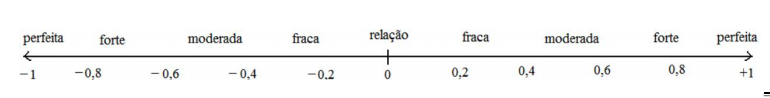

In [92]:
Image(filename="correlacao.png", width=600, height=400)

## 3. Estimar parâmetros, verificar a qualidade, calcular os erros

### 3.1. Gráfico de dispersão
Abaixo realizaremos o teste visual de dispersão da amostragem, por meio da geração do gráfico de dispersão das amostras.

Text(0.5, 1.0, 'Gráfico de Dispersão entre altura e peso')

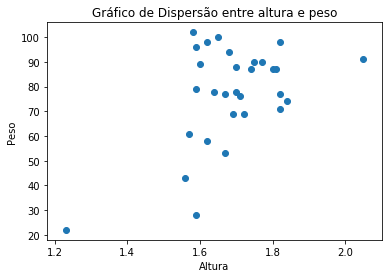

In [68]:
plt.scatter(data['ALTURA'], data['PESO'])
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Gráfico de Dispersão entre altura e peso')

#### Para melhor visualização, faremos uma transformação logaritmica

Text(0.5, 1.0, 'Gráfico de Dispersão entre altura e peso com transformação logaritmica')

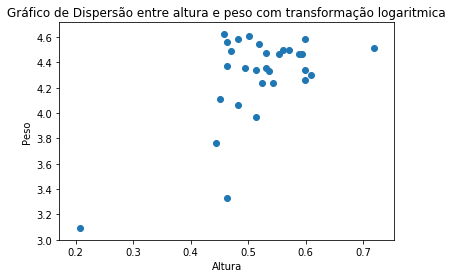

In [80]:
plt.scatter(np.log(data['ALTURA']), np.log(data['PESO']))
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Gráfico de Dispersão entre altura e peso com transformação logaritmica')

A visualização gŕafica, sugere que há uma correlação positiva entre as variáveis, mas, moderada.

### 3.2. Estimativa de parâmetros

In [72]:
x = data['PESO']
y = data['ALTURA']
n = len(x)

xy = np.multiply(x,y)
xx = np.multiply(x,x)
yy = np.multiply(y,y)

soma_y = sum(y) #soma y
soma_x = sum(x) #soma x
sum_x2 = (sum(x)**2) #soma x2
sum_y2 = (sum(y)**2) #soma y2

media_y = np.mean(y) #media y
media_x = np.mean(x) #media x

### 3.3. Verificação de qualidade

Para verificarmos a qualidade, é necessário calcular os valores de $\beta_0$ e $\beta_1$ que compõem a equação:

$\hat{y} = \beta_0 + \beta_1xi$

Onde:

- $\hat{y}$ é a variável aleatória
- $x$ é variável independete
- $\beta_0$ interceptação
- $\beta_1$ coeficiente de inclinação

\begin{equation*}
b_1 = \frac{n \sum_{}(xy) - \overline{nxy} }{\sum_{}(x^{2}) - n(\overline{x})^{2}}
\end{equation*}


\begin{equation*}
b_0 = \overline{y} - b_1\overline{x} 
\end{equation*}

#### Cálculo do b1
O cálculo do b1 foi feito de acordo com a fórmula acima.

In [17]:
b1 = float(sum(x)*sum(y)-(n*(sum(xy)))) / ((sum(x)**2) - n*sum(xx))
print(b1)

0.0034778534923339674


#### Cálculo do b0
O cálculo do b0 foi feito de acordo com a fórmula acima.

In [19]:
b0 = (media_y)-(b1*media_x)
print(b0)

1.4188719477569514


### 3.1. Verificação da qualidade do estimador
Para verificar a qualidade do estimador, é necessário calcular os valores de SSE, SST, SSR e R². Abaixo será apresentado as fórmulas, juntamente com o cálculo dos valores.

#### SSE

Para calcular o valor do SSE, usaremos a seguinte fórmula:

\begin{equation*}
SSE = \sum y^2 - b_0\sum y - b_1 \sum xy
\end{equation*}

In [45]:
sse = sum_y2 - b0*(sum_y) - b1*(sum(xy))
print(""sse)

2474.8726659085746


#### SST
Para calcular o valor do SST, usaremos a seguinte fórmula:

\begin{equation*}
SST = \sum y^2 - n(\overline{y})^2
\end{equation*}


In [57]:
sst = sum_y2 - n*(media_y)**2
print("SST: ",sst)

2475.014666666667


#### SSR

Para calcular o valor do SSR, usaremos a seguinte fórmula:

\begin{equation*}
SSR = SST - SSE
\end{equation*}


In [46]:
ssr = sst-sse
print("SSR: ", ssr)

0.1420007580923084


#### R$^2$

Para calcular o valor do R$^2$, usaremos a seguinte fórmula:

\begin{equation*}
R^2 = \frac{SSR}{SST}
\end{equation*}


In [118]:
r_2 = sse/sst

print(r_2)

0.9999426262963187


O modelo acima explica **99%** da variação

### 3.2. Cálculo dos erros


Baseia-se em calcular a diferença entre o valor que foi previsto pelo modelo e o valor real.

\begin{equation*}
QME = \frac{SSE}{n-2}
\end{equation*}

In [158]:
qme = sse/(n-2)
qme

88.3883094967348

#### Verificando resíduos

In [178]:
resultado_regressao = sm.OLS(x, y).fit()
data['Residuos'] = resultado_regressao.resid


print("Média dos resíduos: ",data.Residuos.mean())



Média dos resíduos:  -0.30792825138555124


#### Resíduos da ALTURA

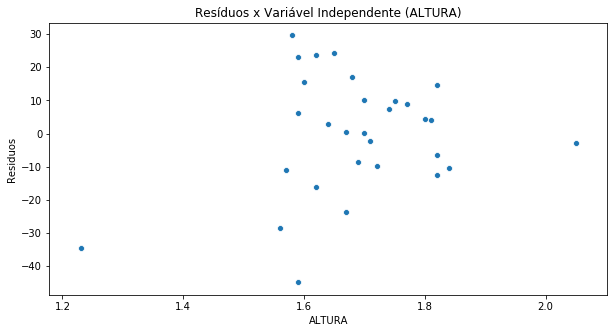

In [187]:
ax = sns.scatterplot(x = data.ALTURA, y=data.Residuos)
ax.figure.set_size_inches(10,5)
ax.set_title('Resíduos x Variável Independente (ALTURA)')
ax

#### Resíduos do PESO

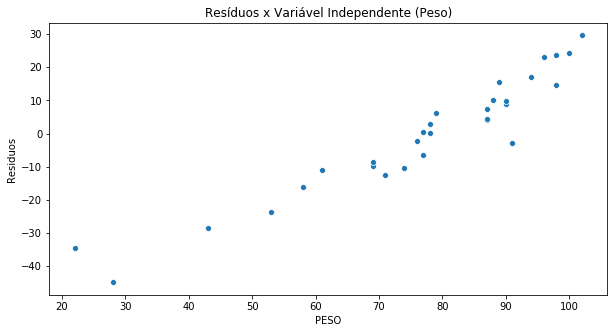

In [186]:
ax = sns.scatterplot(x = data.PESO, y=data.Residuos)
ax.figure.set_size_inches(10,5)
ax.set_title('Resíduos x Variável Independente (Peso)')
ax

## 4. Cálculo do desvio padrão dos erros e dos parâmetros:

### 4.1. Desvio padrão do erro

Para calcular o desvio padrão do QME, usaremos a seguinte fórmula:

\begin{equation*}
DP = \sqrt[]{QME}
\end{equation*}


In [163]:
dp = qme ** 1/2
print("Desvio padrão do erro",dp)

Desvio padrão do erro 44.1941547483674


### 4.2. Desvio padrão dos parâmetros:
Para calcular o desvio padrão do parâmetros, usaremos a função da biblioteca numpy

In [185]:
desvio_padrao1 = np.std(x)
desvio_padrao2 = np.std(y)

print("Desvio padrão do parâmetro 1: ", desvio_padrao1)
print("Desvio padrão do parâmetro 2: ", desvio_padrao2)

Desvio padrão do parâmetro 1:  19.782146833277054
Desvio padrão do parâmetro 2:  0.13550727737735055


##  5. Cálculo do intervalo de confiança dos parâmetros:
Um intervalo de confiança (IC) é um intervalo estimado de um parâmetro de interesse de uma população. Em vez de estimar o parâmetro por um único valor, é dado um intervalo de estimativas prováveis. O quanto estas estimativas são prováveis será determinado pelo coeficiente de confiança $ (1-\alpha) $, para $ \alpha \in (0, 1) $.

Intervalos de confiança são usados para indicar a confiabilidade de uma estimativa. Por exemplo, um IC pode ser usado para descrever o quanto os resultados de uma pesquisa são confiáveis. Sendo todas as estimativas iguais, uma pesquisa que resulte num IC pequeno é mais confiável do que uma que resulte num IC maior


Para os dois parâmetros utilizados nesse exemplo de caso, usaremos a média já calculada anteriormente e o intervalo de confiança:

### 5.1. Cálculo dos intervalos de confiança do parâmetro 1.
Cálculo do intervalo de confiança do parâmetro 1 para os níveis de confiança em 90,95 e 99% respectivamente conforme abaixo: 


In [69]:
conf_int = scipy.stats.norm.interval(0.90, loc=media_x, scale=desvio_padrao1) 
print("Intervalo de Confiança do PESO, para o nível de confiança a 90%: ")
print(conf_int)
print("---------------------------------------------------------------------------------------------------------")

conf_int = scipy.stats.norm.interval(0.95, loc=media_x, scale=desvio_padrao1) 
print("Intervalo de Confiança do PESO, para o nível de confiança a 95%: ")
print(conf_int)
print("---------------------------------------------------------------------------------------------------------")
                                       
conf_int = scipy.stats.norm.interval(0.99, loc=media_x, scale=desvio_padrao1) 
print("Intervalo de Confiança do PESO, para o nível de confiança a 99%: ")
print(conf_int)


Intervalo de Confiança do PESO, para o nível de confiança a 90%: 
(44.461264032397644, 109.53873596760235)
---------------------------------------------------------------------------------------------------------
Intervalo de Confiança do PESO, para o nível de confiança a 95%: 
(38.227704669893896, 115.7722953301061)
---------------------------------------------------------------------------------------------------------
Intervalo de Confiança do PESO, para o nível de confiança a 99%: 
(26.044566499737883, 127.95543350026212)


### 5.2. Cálculo dos intervalos de confiança do parâmetro 2.
Cálculo do intervalo de confiança do parâmetro 2 para os níveis de confiança em 90,95 e 99% respectivamente conforme abaixo:

In [71]:

conf_int = scipy.stats.norm.interval(0.90, loc=media_y, scale=desvio_padrao2) 
print("Intervalo de Confiança da ALTURA, para o nível de confiança a 90%: ")
print(conf_int)
print("---------------------------------------------------------------------------------------------------------")

conf_int = scipy.stats.norm.interval(0.95, loc=media_y, scale=desvio_padrao2) 
print("Intervalo de Confiança da ALTURA, para o nível de confiança a 95%: ")
print(conf_int)
print("---------------------------------------------------------------------------------------------------------")
                                        
conf_int = scipy.stats.norm.interval(0.99, loc=media_y, scale=desvio_padrao2) 
print("Intervalo de Confiança da ALTURA, para o nível de confiança a 99%: ")
print(conf_int)


Intervalo de Confiança da ALTURA, para o nível de confiança a 90%: 
(1.4637770299942123, 1.909556303339121)
---------------------------------------------------------------------------------------------------------
Intervalo de Confiança da ALTURA, para o nível de confiança a 95%: 
(1.4210772833639804, 1.952256049969353)
---------------------------------------------------------------------------------------------------------
Intervalo de Confiança da ALTURA, para o nível de confiança a 99%: 
(1.3376230507539582, 2.0357102825793754)


##  6. Testes Visuais

### 6.1. Teste de linearidade

In [164]:
xregr = np.array(x).reshape(-1,1)
yregr = np.array(y).reshape(-1,1)

ln = LinearRegression()
ln.fit(xregr,yregr)

print("Interceptação do eixo y no eixo x: ", ln.intercept_)

Interceptação do eixo y no eixo x:  [1.41887195]


Text(0.5, 1.0, 'Teste visual de linearidade')

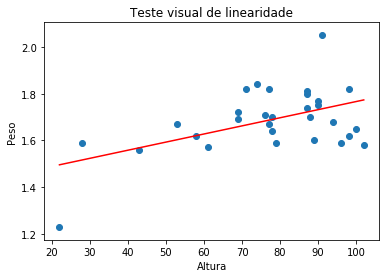

In [128]:
plt.scatter(xregr,yregr)
plt.plot(xregr, model.predict(xregr),color = 'red')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Teste visual de linearidade')

### 6.2. Teste de independência dos erros

### 6.3. Teste de erros normais

### 6.4. Teste de homocedasticidade
Homocedasticidade: termo usado para designar variância constante dos erros experimentais para observações distintas.

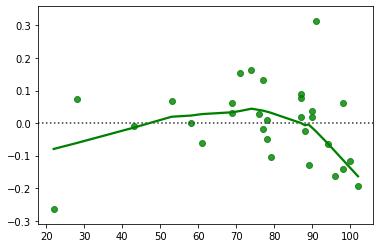

In [190]:
sns.residplot(x, y, lowess=True, color="g")